<a href="https://colab.research.google.com/github/sugenej/SarsCov2/blob/main/Coronavirus_chEMBL_Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2025-05-27 05:59:08--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   103MB/s    in 0.8s    

2025-05-27 05:59:09 (103 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=p

In [2]:
import pandas as pd


In [4]:
df = pd.read_csv('bioactivity_data_preprocessed (3).csv')


In [7]:
!pip install rdkit-pypi
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [8]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [9]:
df_lipinski = lipinski(df.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,281.271,1.89262,0.0,5.0
1,415.589,3.81320,0.0,2.0
2,421.190,2.66050,0.0,4.0
3,293.347,3.63080,0.0,3.0
4,338.344,3.53900,0.0,5.0
...,...,...,...,...
240,328.466,3.34562,1.0,5.0
241,222.379,-1.99300,1.0,3.0
242,485.559,0.54470,5.0,7.0
243,222.379,-1.99300,1.0,3.0


In [10]:
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,bioactivity_class.1
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,7200.00,intermediate
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,9400.00,intermediate
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,13500.00,inactive
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,13110.00,inactive
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,2000.00,intermediate
...,...,...,...,...,...
240,CHEMBL4590273,Cc1cccc2nc(CSC(=S)NCc3cccnc3)cn12,active,380.19,active
241,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],active,165.00,active
242,CHEMBL2365410,CC(C)C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](CC1C...,active,161.00,active
243,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],active,165.96,active


In [11]:
df_combined = pd.concat([df,df_lipinski], axis=1)
df_combined

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,bioactivity_class.1,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,7200.00,intermediate,281.271,1.89262,0.0,5.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,9400.00,intermediate,415.589,3.81320,0.0,2.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,13500.00,inactive,421.190,2.66050,0.0,4.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,13110.00,inactive,293.347,3.63080,0.0,3.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,2000.00,intermediate,338.344,3.53900,0.0,5.0
...,...,...,...,...,...,...,...,...,...
240,CHEMBL4590273,Cc1cccc2nc(CSC(=S)NCc3cccnc3)cn12,active,380.19,active,328.466,3.34562,1.0,5.0
241,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],active,165.00,active,222.379,-1.99300,1.0,3.0
242,CHEMBL2365410,CC(C)C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](CC1C...,active,161.00,active,485.559,0.54470,5.0,7.0
243,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],active,165.96,active,222.379,-1.99300,1.0,3.0


In [25]:
import numpy as np
import pandas as pd

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50

    # Explicitly specify axis as a keyword argument to drop the column
    x = input.drop('standard_value_norm', axis=1)

    return x

In [13]:
df_combined.standard_value.describe()

,standard_value
count,2.450000e+02
mean,6.893878e+04
std,1.851962e+05
min,5.000000e+01
25%,5.000000e+03
50%,1.500000e+04
75%,4.700000e+04
max,2.000000e+06


In [14]:
-np.log10( (10**-9)* 100000000 )

np.float64(1.0)

In [15]:
-np.log10( (10**-9)* 100000000 )

np.float64(1.0)

In [18]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    # Explicitly specify axis as a keyword argument
    x = input.drop('standard_value', axis=1)

    return x

In [19]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,bioactivity_class.1,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,intermediate,281.271,1.89262,0.0,5.0,7200.00
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,intermediate,415.589,3.81320,0.0,2.0,9400.00
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,inactive,421.190,2.66050,0.0,4.0,13500.00
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,inactive,293.347,3.63080,0.0,3.0,13110.00
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,intermediate,338.344,3.53900,0.0,5.0,2000.00
...,...,...,...,...,...,...,...,...,...
240,CHEMBL4590273,Cc1cccc2nc(CSC(=S)NCc3cccnc3)cn12,active,active,328.466,3.34562,1.0,5.0,380.19
241,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],active,active,222.379,-1.99300,1.0,3.0,165.00
242,CHEMBL2365410,CC(C)C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](CC1C...,active,active,485.559,0.54470,5.0,7.0,161.00
243,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],active,active,222.379,-1.99300,1.0,3.0,165.96


In [20]:
df_norm.standard_value_norm.describe()

,standard_value_norm
count,2.450000e+02
mean,6.893878e+04
std,1.851962e+05
min,5.000000e+01
25%,5.000000e+03
50%,1.500000e+04
75%,4.700000e+04
max,2.000000e+06


In [26]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,bioactivity_class.1,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,intermediate,281.271,1.89262,0.0,5.0,5.142668
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,intermediate,415.589,3.81320,0.0,2.0,5.026872
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,inactive,421.190,2.66050,0.0,4.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,inactive,293.347,3.63080,0.0,3.0,4.882397
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,intermediate,338.344,3.53900,0.0,5.0,5.698970
...,...,...,...,...,...,...,...,...,...
240,CHEMBL4590273,Cc1cccc2nc(CSC(=S)NCc3cccnc3)cn12,active,active,328.466,3.34562,1.0,5.0,6.419999
241,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],active,active,222.379,-1.99300,1.0,3.0,6.782516
242,CHEMBL2365410,CC(C)C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](CC1C...,active,active,485.559,0.54470,5.0,7.0,6.793174
243,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],active,active,222.379,-1.99300,1.0,3.0,6.779997


In [27]:
df_final.pIC50.describe()

,pIC50
count,245.000000
mean,4.894585
std,0.911338
min,2.698970
25%,4.327902
50%,4.823909
75%,5.301030
max,7.301030


In [28]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,bioactivity_class.1,MW,LogP,NumHDonors,NumHAcceptors,pIC50
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,inactive,421.190,2.66050,0.0,4.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,inactive,293.347,3.63080,0.0,3.0,4.882397
5,CHEMBL365134,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21,active,active,372.243,4.39330,0.0,3.0,6.008774
7,CHEMBL190743,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21,active,active,419.243,4.23540,0.0,3.0,6.022276
8,CHEMBL365469,O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21,inactive,inactive,327.792,4.28420,0.0,3.0,4.950782
...,...,...,...,...,...,...,...,...,...
240,CHEMBL4590273,Cc1cccc2nc(CSC(=S)NCc3cccnc3)cn12,active,active,328.466,3.34562,1.0,5.0,6.419999
241,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],active,active,222.379,-1.99300,1.0,3.0,6.782516
242,CHEMBL2365410,CC(C)C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](CC1C...,active,active,485.559,0.54470,5.0,7.0,6.793174
243,CHEMBL5436771,S=C([S-])NCc1cccnc1.[K+],active,active,222.379,-1.99300,1.0,3.0,6.779997


In [29]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

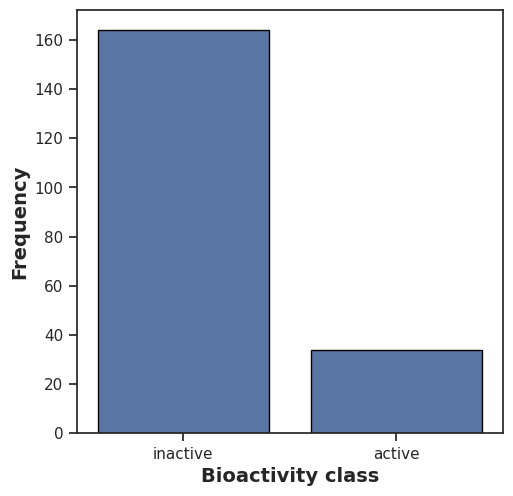

In [30]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

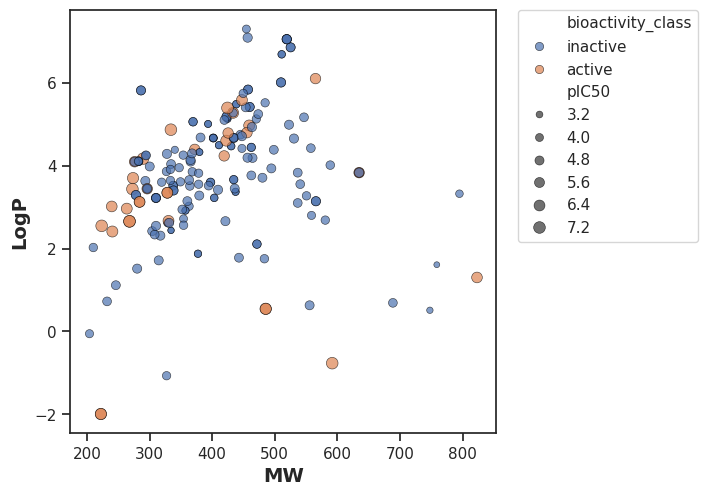

In [31]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

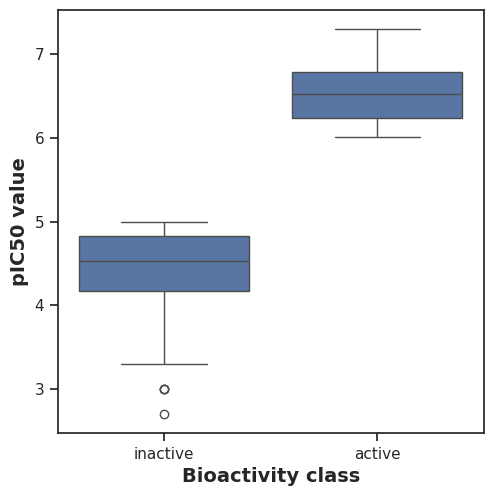

In [32]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [33]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

  mannwhitney('pIC50')

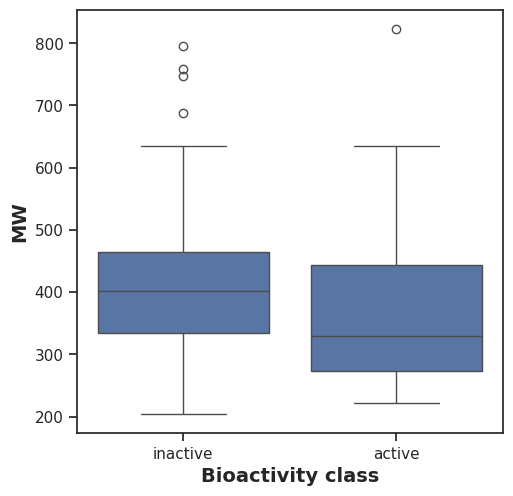

In [35]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')


In [34]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,1996.5,0.009286,0.05,Different distribution (reject H0)


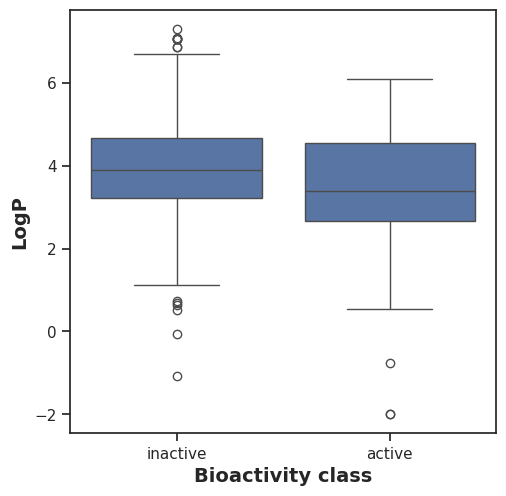

In [36]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [37]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,2222.5,0.063155,0.05,Same distribution (fail to reject H0)


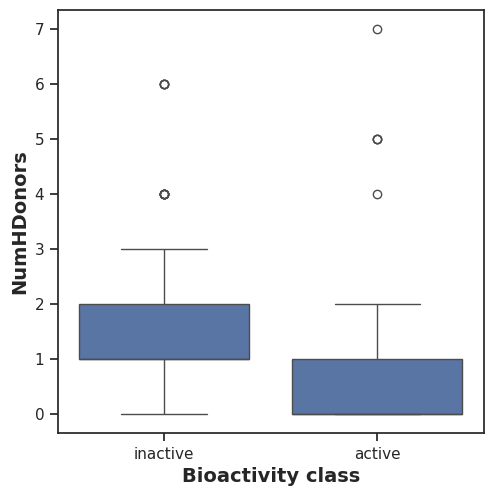

In [38]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [39]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,1831.5,0.001049,0.05,Different distribution (reject H0)


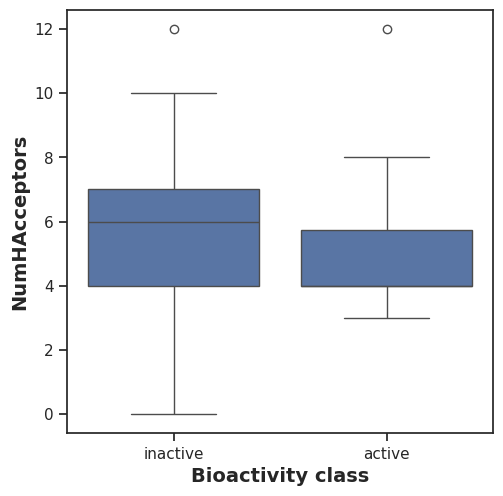

In [40]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [41]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,2033.5,0.012124,0.05,Different distribution (reject H0)


In [42]:
! zip -r results.zip . -i *.csv *.pdf

  adding: plot_NumHAcceptors.pdf (deflated 37%)
  adding: plot_ic50.pdf (deflated 37%)
  adding: plot_LogP.pdf (deflated 40%)
  adding: plot_MW_vs_LogP.pdf (deflated 11%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: plot_bioactivity_class.pdf (deflated 37%)
  adding: mannwhitneyu_LogP.csv (deflated 8%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 10%)
  adding: bioactivity_data_preprocessed (3).csv (deflated 83%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: plot_MW.pdf (deflated 37%)
